In [53]:
import tensorflow as tf
import numpy as np

from mrl import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## train

In [236]:
agent = MRLAgent(gamma=.7,stsize=30,seed=3)
train_data = agent.train(3000,switch_param=0.01)

train env = switching 0.010000
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


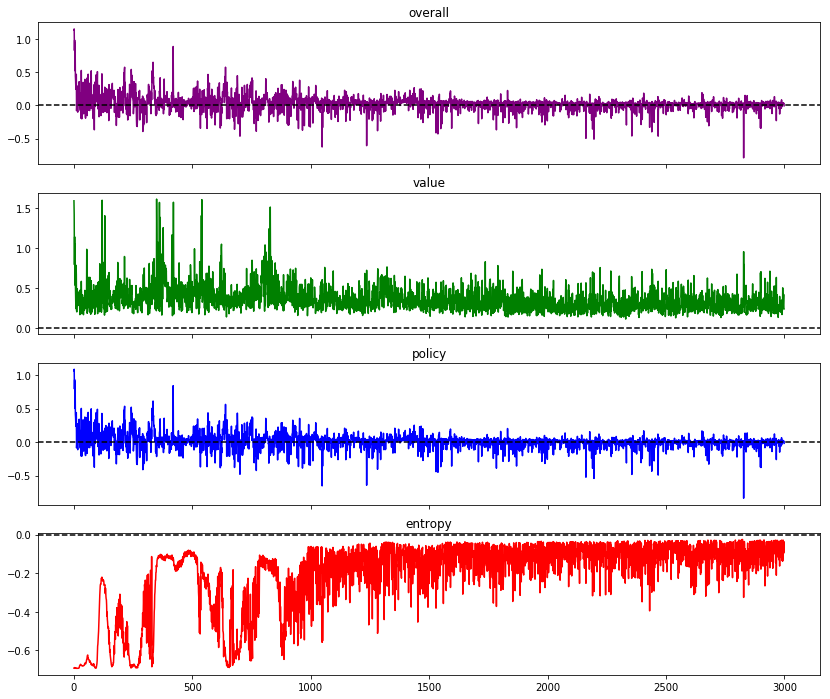

In [237]:
fig,axarr = plt.subplots(4,1,figsize=(14,12),sharex=True)

cL = ['purple','g','b','r']
titleL = ['overall','value','policy','entropy']
for i in range(4):
  axarr[i].plot(train_data[:,i],c=cL[i])
  axarr[i].set_title(titleL[i])
  axarr[i].axhline(0,c='black',ls='--')

# plt.savefig('figures/train_loss-3000epochs-1eps-env_switching8020')

In [241]:
eps = 500
eval_r1 = agent.eval(eps,switch_param=10,banditpr=.8)
eval_r2 = agent.eval(eps,switch_param=10,banditpr=.2)

eval env = switching 10.000000
eval env = switching 10.000000


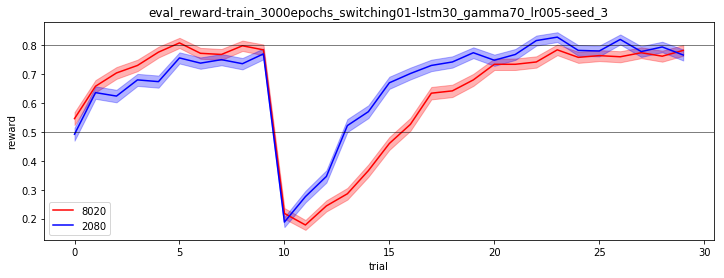

In [245]:
plt.figure(figsize=(12,4))
cL = ['r','b']
nL = ['8020','2080']
for idx,eval_r in enumerate([eval_r1,eval_r2]):
  M = eval_r.mean(0)
  S = eval_r.std(0)/np.sqrt(eps)
  plt.plot(M,c=cL[idx],label=nL[idx])
  plt.fill_between(np.arange(30),M-S,M+S,alpha=.3,color=cL[idx])
plt.legend()
plt.axhline(0.5,c='black',lw=.5)
plt.axhline(0.8,c='black',lw=.5)
# plt.ylim(0.4,0.9)
plt.ylabel('reward')
plt.xlabel('trial')
title = 'eval_reward-train_3000epochs_switching01-lstm30_gamma70_lr005-seed_3'
plt.title(title)
plt.savefig('figures/'+title)

In [242]:
5e-3

0.005

### eval plot

### regret plot

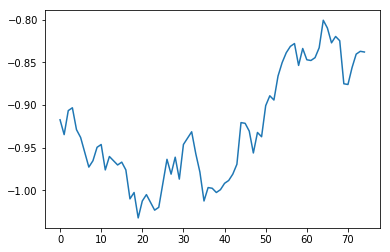

In [24]:
# is the agent just exploting one arm which is slightly more likely under the current random seed?
R=[]
for i in range(500):
  eval_reward = agent.eval(1)
  bandit = np.round(agent.env.banditpr[0],1)
  if bandit==0.1:
    c='r'
  elif bandit==0.9:
    c='b'
    continue
  regret=.9*np.arange(75)-np.cumsum(eval_reward)
  R.append(regret)
#   plt.plot(regret,color=c)
  
plt.plot(np.mean(R,0))